In [1]:
# Imports
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark = (SparkSession.builder.master("local")
         .appName('FleetAnalysis')
         .getOrCreate())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/07 20:17:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
reg_veh = spark.read.csv(path="/Users/hitesh/workplace/quick_octopus/data/road-transport-year-book-2019-20/year-wise-total-number-registered-motor-vehicles-india-1951-2020.csv",
               header=True)

In [4]:
reg_veh.show()

+-----------------------+---------------------------+---------------------------+------------------------------------+--------------------+-----------------------------+---------------------+
|Year (As on 31st March)|All Vehicles (In thousands)|Two Wheelers (In thousands)|Cars, Jeeps and Taxis (In thousands)|Buses (In thousands)|Goods Vehicles (In thousands)|Others (In thousands)|
+-----------------------+---------------------------+---------------------------+------------------------------------+--------------------+-----------------------------+---------------------+
|                   1951|                        306|                         27|                                 159|                  34|                           82|                    4|
|                   1956|                        426|                         41|                                 203|                  47|                          119|                   16|
|                   1959|               

Index(['Year (As on 31st March)', 'All Vehicles (In thousands)',
       'Two Wheelers (In thousands)', 'Cars, Jeeps and Taxis (In thousands)',
       'Buses (In thousands)', 'Goods Vehicles (In thousands)',
       'Others (In thousands)'],
      dtype='object')

## Creating Graphs

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter


In [56]:
reg_veh_pd = reg_veh.toPandas()
reg_veh_pd = reg_veh_pd[:-1][-20:] 
columns = reg_veh_pd.columns
x = np.array((reg_veh_pd['Year (As on 31st March)']))


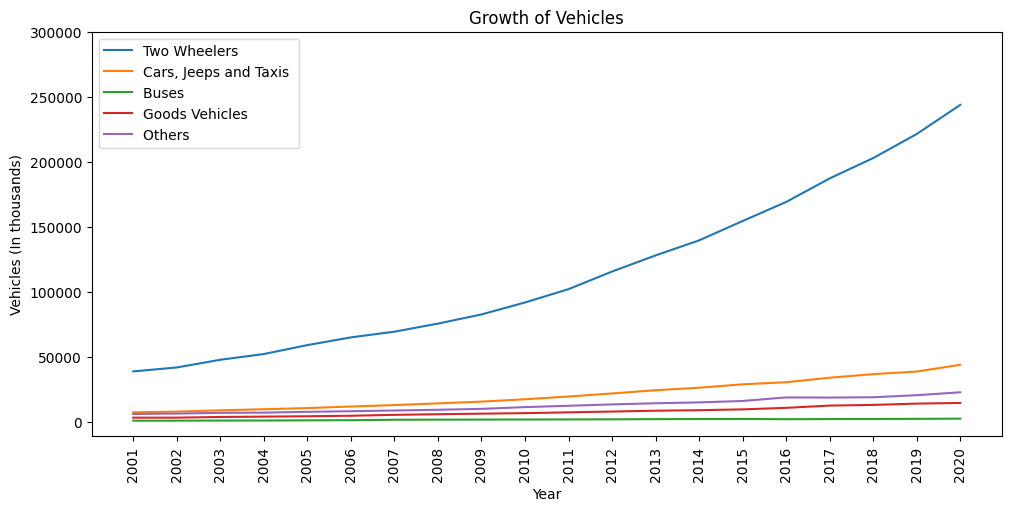

In [57]:

plt.figure(figsize=(10, 5), layout='constrained')
for col in columns[2:]:
    plt.plot(x, pd.to_numeric(reg_veh_pd[col]), label=col[:col.find("(In thou")])
plt.xlabel('Year')
plt.ylabel('Vehicles (In thousands)')
plt.title("Growth of Vehicles")
plt.yticks(np.arange(0,330000, 50000))
plt.xticks(rotation=90)
plt.legend()

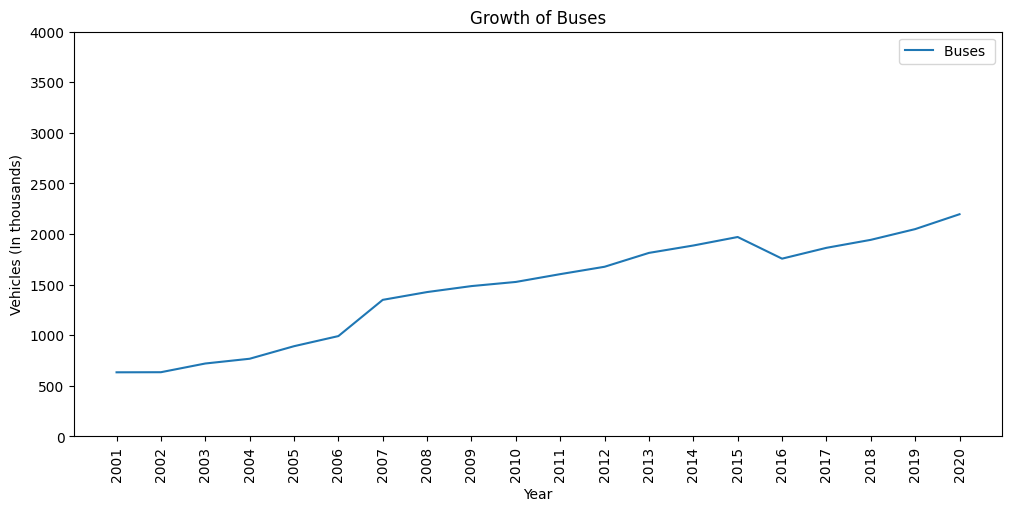

In [64]:

plt.figure(figsize=(10, 5), layout='constrained')
for col in columns[2:]:
    if "Buses" in col:
        plt.plot(x, pd.to_numeric(reg_veh_pd[col]), label=col[:col.find("(In thou")])
plt.xlabel('Year')
plt.ylabel('Vehicles (In thousands)')
plt.title("Growth of Buses")
plt.yticks(np.arange(0,4500, 500))
plt.xticks(rotation=90)
plt.legend()